

---


# Acumula por dia os flashes do GLM do GOES-19 dos arquivos de 20s que foram baixados da Amazon


---



 - Dados GLM GOES-19 fornecido pela AMAZON: https://noaa-goes19.s3.amazonaws.com/index.html#GLM-L2-LCFA/

- 2025-09-22T00:01:00.000000000
- OR_GLM-L2-LCFA_G19_s20252650001000_e20252650001200_c20252650001223.nc
 - Realizado por: Enrique V. Mattos - 25/09/2025



---
 - Em `1 hora` temos `180 arquivos` e `demora 2min e 6s`.
 - Em `1 dia` temos `4320 arquivos` e `demora 1h, 53min e 14s`.

---





# **1° Passo:** Preparando ambiente

In [1]:
# instala bibliotecas
!pip install ultraplot cartopy

# importa bibliotecas
import os
import time
import glob
import xarray as xr
import numpy as np
import pandas as pd
import ultraplot as uplt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import warnings
warnings.filterwarnings("ignore")

# monta drive
from google.colab import drive
drive.mount('/content/drive')

# diretórios
dir = '/content/drive/MyDrive/2-PESQUISA/0_GLM/estudos_de_caso/2025-09-22-FRENTEFRIA_RS_SUDESTE'
dir_input = f'{dir}/output/glm_20s'
dir_output = f'{dir}/output/glm_diario'
os.makedirs(dir_output, exist_ok=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 45.0 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/ultraplot/__init__.py:77: UltraPlotWarning: Rebuilding font cache. This usually happens after installing or updating ultraplot.
  register_fonts(default=True)


Mounted at /content/drive


# **2° Passo:** Declarando funções

In [2]:
# Função que calcula o índice i e j da localização do relâmpago
def index(longitudes_matriz, latitudes_matriz, lon_raio, lat_raio):

    ''' Função para calcular o índice (i e j) do pixel de uma matriz que o relâmpago pertence

    Parâmetros:
               longitudes_matriz (array): array de uma dimensão das longitudes da matriz em graus
               latitudes_matriz (array): array de uma dimensão das latitudes da matriz em graus
               lon_raio (float): valor da longitude do relâmpago em graus
               lat_raio (float): valor da latitude do relâmpago em graus

    Retorna:
            indice_lat_raio (float): índice da latitude (ou seja, da linha) do pixel da matriz que o relâmpago pertence
            indice_lon_raio (float): índice da longitude (ou seja, da coluna) do pixel da matriz que o relâmpago pertence
    '''

    # calcula a diferença entre as lats/lons da matriz e a latitude/longitude do relâmpago
    distancia_lon = (longitudes_matriz - lon_raio)**2
    distancia_lat = (latitudes_matriz - lat_raio)**2

    # índice da longitude e latitude do relâmpago
    indice_lon_raio = np.nonzero(distancia_lon == np.min(distancia_lon))
    indice_lat_raio = np.nonzero(distancia_lat == np.min(distancia_lat))

    # retorna os valores dos índices calculados
    return indice_lat_raio, indice_lon_raio

# **Seleciona os flashes da área de interesse**
 - Em `1 hora` temos `180 arquivos` e `demora 2min e 6s`.
 - Em `1 dia` temos `4320 arquivos` e `demora 1h, 53min e 14s`.

In [3]:
%%time
# data
data = '2025-08-22'
#files = sorted(glob.glob(f'{dir_input}/{data}/00/*.nc'))
files = sorted(glob.glob(f'{dir_input}/{data}/*/*.nc'))
#files=files[0:500]

# área desejada
lonmin, lonmax, latmin, latmax = -65, -35, -35, -10

# Lista para armazenar dados filtrados (mais eficiente que DataFrames)
filtered_data = []

# Otimização: pré-compilar condições de filtro
def in_region(lon, lat):
    return (lon > lonmin) & (lon < lonmax) & (lat > latmin) & (lat < latmax)

# Loop otimizado
for file in files:

    # Usando context manager para fechar arquivo automaticamente
    with xr.open_dataset(file) as glm_20s:

        # Acessando arrays diretamente (mais rápido que via DataFrame)
        lons = glm_20s['flash_lon'].values
        lats = glm_20s['flash_lat'].values

        # Máscara booleana vetorizada (mais rápido que filtro no DataFrame)
        mask = in_region(lons, lats)

        # Apenas processa se houver dados na região
        if np.any(mask):

            time_str = str(glm_20s['product_time'].values)
            print(time_str)

            # Cria DataFrame apenas com dados filtrados
            df_filtered = pd.DataFrame({'time': [time_str] * np.sum(mask),
                                        'lat': lats[mask],
                                        'lon': lons[mask]})

            filtered_data.append(df_filtered)

# Concatenação final (mais eficiente)
df_flash_total = pd.concat(filtered_data, ignore_index=True) if filtered_data else pd.DataFrame(columns=['time', 'lat', 'lon'])

2025-08-22T00:00:00.000000000
2025-08-22T00:00:20.000000000
2025-08-22T00:00:40.000000000
2025-08-22T00:01:00.000000000
2025-08-22T00:01:20.000000000
2025-08-22T00:01:40.000000000
2025-08-22T00:02:00.000000000
2025-08-22T00:02:20.000000000
2025-08-22T00:02:40.000000000
2025-08-22T00:03:00.000000000
2025-08-22T00:03:20.000000000
2025-08-22T00:03:40.000000000
2025-08-22T00:04:00.000000000
2025-08-22T00:04:20.000000000
2025-08-22T00:04:40.000000000
2025-08-22T00:05:00.000000000
2025-08-22T00:05:20.000000000
2025-08-22T00:05:40.000000000
2025-08-22T00:06:00.000000000
2025-08-22T00:06:20.000000000
2025-08-22T00:06:40.000000000
2025-08-22T00:07:00.000000000
2025-08-22T00:07:20.000000000
2025-08-22T00:07:40.000000000
2025-08-22T00:08:00.000000000
2025-08-22T00:08:20.000000000
2025-08-22T00:08:40.000000000
2025-08-22T00:09:00.000000000
2025-08-22T00:09:20.000000000
2025-08-22T00:09:40.000000000
2025-08-22T00:10:00.000000000
2025-08-22T00:10:20.000000000
2025-08-22T00:10:40.000000000
2025-08-22

In [4]:
df_flash_total

,time,lat,lon
0,2025-08-22T00:00:00.000000000,-28.711136,-53.893288
1,2025-08-22T00:00:00.000000000,-29.547630,-55.931053
2,2025-08-22T00:00:00.000000000,-28.682552,-54.262444
3,2025-08-22T00:00:00.000000000,-29.515085,-55.656754
4,2025-08-22T00:00:00.000000000,-29.435930,-55.449776
...,...,...,...
663148,2025-08-22T23:59:40.000000000,-31.175753,-52.600811
663149,2025-08-22T23:59:40.000000000,-29.500877,-54.535236
663150,2025-08-22T23:59:40.000000000,-30.568867,-53.723473
663151,2025-08-22T23:59:40.000000000,-28.001081,-56.970058


# **Acumula na grade**

In [5]:
%%time
# área desejada
lonmin, lonmax, latmin, latmax = -65, -35, -35, -10

# espaçamento da grade
delta = 0.08   # grade com 8 km de resolução espacial

# montando a grade
lons = np.arange(lonmin, lonmax, delta)
#lats = np.arange(latmax, latmin, -delta)
lats = np.arange(latmin, latmax, delta)

# quantidade de pontos para longitude e latitude
nlon = len(lons)
nlat = len(lats)

# transforma de dataframe para numpy.array
flash_lon, flash_lat = df_flash_total['lon'].values, df_flash_total['lat'].values

# declara a matriz de relâmpagos
flashes = np.zeros((nlat, nlon))  # Exemplo: flash = np.zeros(qte_linha, qte_coluna)

# loop em cada longitude e latitude da lista
for lonraio, latraio in zip(flash_lon, flash_lat):

    # função que extrai a qual pixel (ou seja, determina as variáveis 'lin' e 'col') aquele relâmpago pertence
    lin, col = index(lons, lats, lonraio, latraio)

    # soma os relâmpagos por pixel
    flashes[lin,col]+=1

# gera netcdf
data_vars = {'flash':(('lat', 'lon'), flashes, {'units': 'ocorrências/km²', 'long_name':'Raios'})}
coords = {'lat': lats, 'lon': lons}
ds = xr.Dataset(data_vars=data_vars, coords=coords)
ds.to_netcdf(f'{dir_output}/flash_glm_goes19_{data}.nc')

CPU times: user 33.7 s, sys: 243 ms, total: 33.9 s
Wall time: 45 s


In [6]:
ds

<xarray.Dataset> Size: 945kB
Dimensions:  (lat: 313, lon: 375)
Coordinates:
  * lat      (lat) float64 3kB -35.0 -34.92 -34.84 ... -10.2 -10.12 -10.04
  * lon      (lon) float64 3kB -65.0 -64.92 -64.84 ... -35.24 -35.16 -35.08
Data variables:
    flash    (lat, lon) float64 939kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

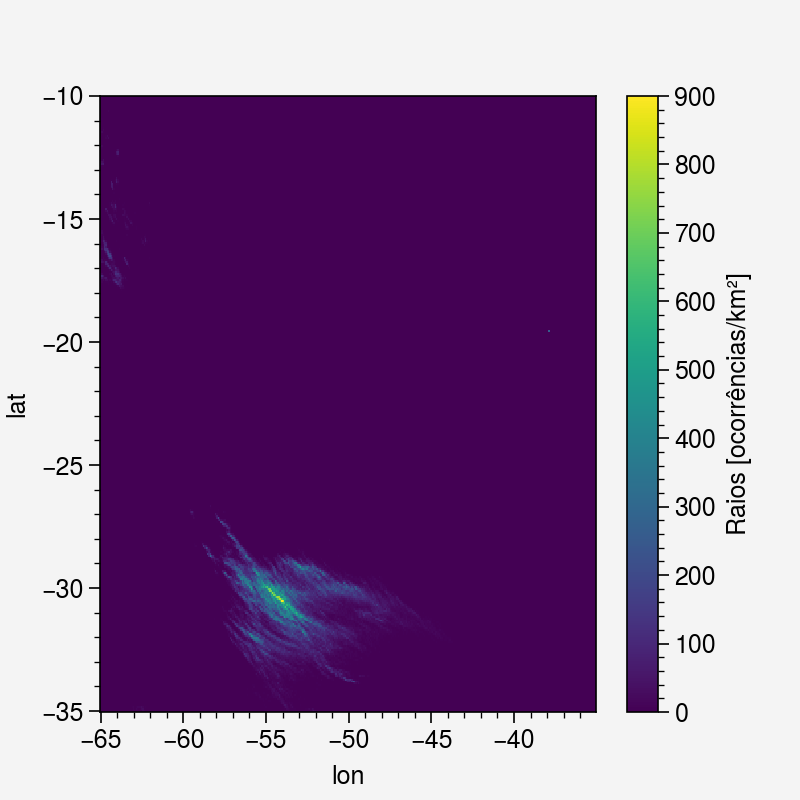

In [7]:
ds['flash'].plot()

# **Plota mapa**

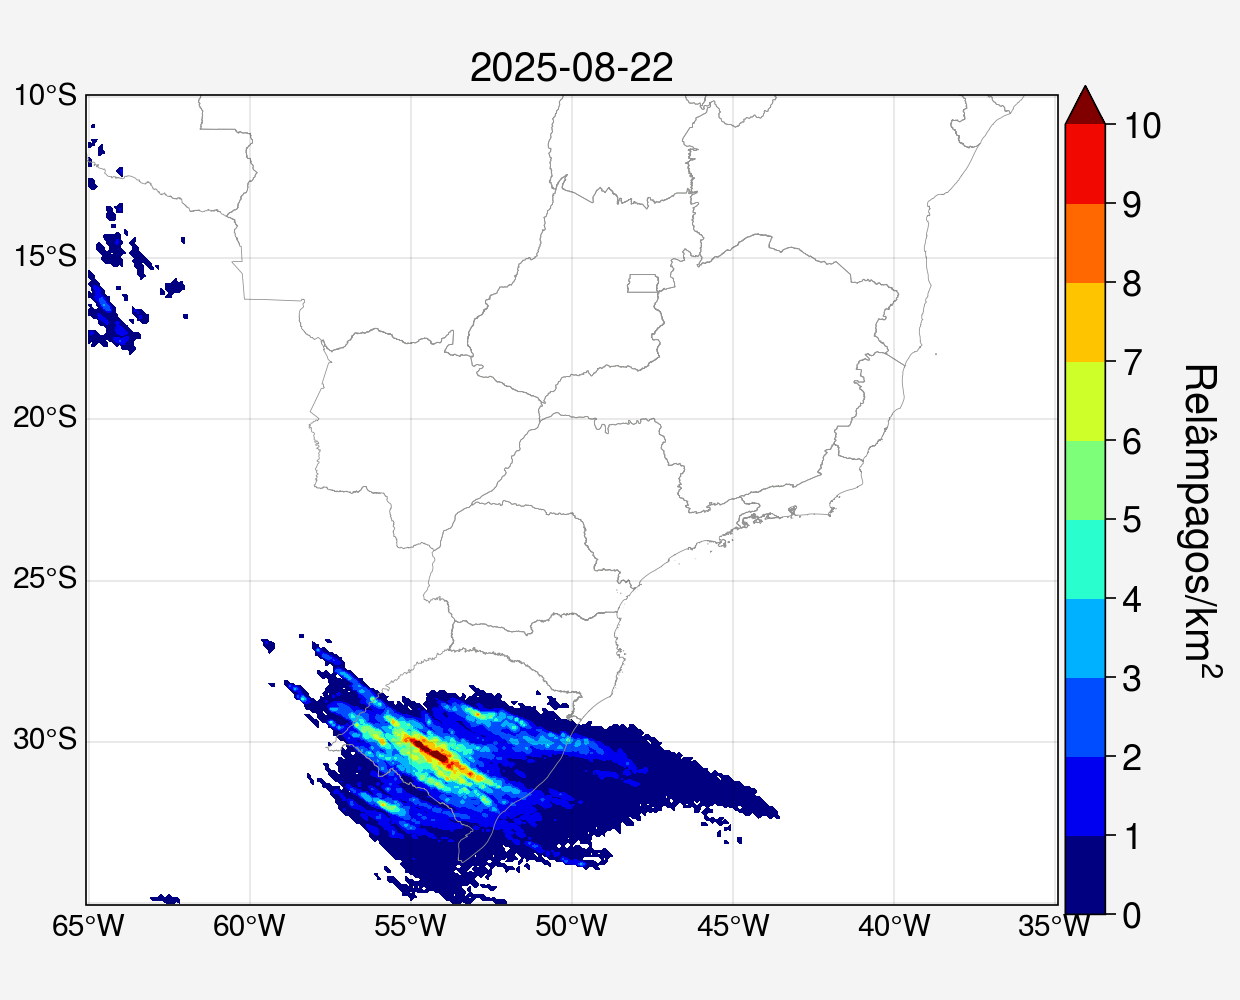

CPU times: user 6.82 s, sys: 269 ms, total: 7.09 s
Wall time: 9.08 s


In [8]:
%%time
# moldura da figura
fig, ax = uplt.subplots(figsize=(6.2,5), tight=True, proj='pcarree')

# fomatação dos eixos da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=5, lonlines=5,
          latlim=(latmin-0.08, latmax+0.08), lonlim=(lonmin-0.08, lonmax+0.08),
          title=f'{data}',
          small='15px', large='20px', abc=False)

# remove valores zero convertendo para NaN (mantém estrutura do xarray)
ds['flash'] = ds['flash'].where(ds['flash'] != 0, np.nan)

# plota figura
map1 = ax.contourf(ds['lon'],
                   ds['lat'],
                   ds['flash']/64.,
                   cmap='jet',
                   vmin=0., vmax=10,
                   levels=uplt.arange(0., 10, 1),
                   extend='max')

# plota contorno dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/refs/heads/main/estados_do_brasil/BR_UF_2019.shp').geometries())
ax[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray', facecolor='none', linewidth=0.3, alpha=1.0)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Relâmpagos/km$^{2}$', length=0.85, ticklabelsize=13, labelsize=15, space=0.3)

# salva figura
fig.save(f'{dir_output}/Fig_1_diario.png', dpi=300)

# exibe na tela
uplt.show()